# Naive Bayes


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_iris
# data = load_iris(as_frame=True)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
target_names = {0:'setosa',1:'versicolor', 2:'virginica'}
df['target'] = iris.target
df['target_names'] = df['target'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


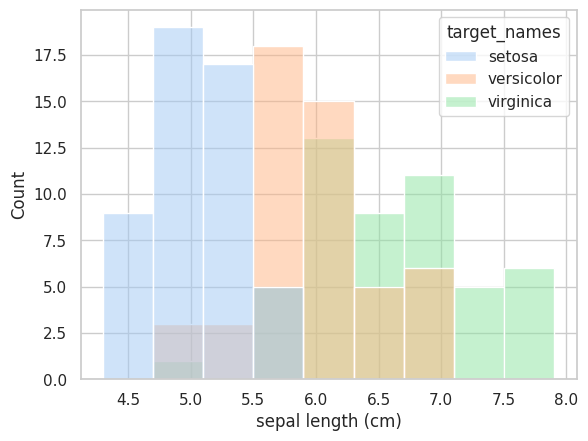

In [4]:
sns.set_theme(style="whitegrid", palette="pastel")
g = sns.histplot(data=df,x="sepal length (cm)", hue="target_names")

# Add missing values

In [5]:
y = df['target_names']
x = df.drop(['target','target_names'],axis=1)
x.shape,y.shape

((150, 4), (150,))

In [6]:
x.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
x = x.mask(np.random.random(x.shape) < .25)

In [8]:
x.isna().sum()

sepal length (cm)    41
sepal width (cm)     47
petal length (cm)    30
petal width (cm)     40
dtype: int64

#Fill na and build a Naive Base classifier

classify the following flower:
sepal length 4.7
sepal width 3.1
petal length 1.3
petal width 0.3

In [9]:
x = x.fillna(x.mean())
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(x_train, y_train)

# Predict the class for the provided flower dimensions
new_flower = np.array([[4.7, 3.1, 1.3, 0.3]])
predicted_class = nb_classifier.predict(new_flower)

print("Predicted Class:", predicted_class[0])

Predicted Class: setosa
